In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

In [24]:
# b = 2, a =-4
a = -4.
b = 2.

In [25]:
def sample(n):
    X = []
    Y = []
    # Формируем однородную непрерывную случайную величину.
    random_variable = sts.uniform()
    # Генерируем случайные числа
    xi = random_variable.rvs(size=n)
    # X_i = e_i(b - a) + a
    for i in range(n):
        x = xi[i] * (b - a) + a
        X.append(x)
        if x < 0:
            y = - (abs(x))**(1/3)
        else:
            y = x**(1/3)
        Y.append(y)
    return Y

## Задание 1)
Критерий Пирсона

Формируем выборку из 200 случайных чисел

In [141]:
n = 200
Y = sample(n)

In [142]:
print(Y)

[-1.3741835932569881, -0.9978012159333324, -1.39361782337593, 1.2421794938802657, 0.5294481735573293, -1.5072425618317735, -1.1282923983872974, 0.6116371807444828, -1.4014202381026843, -0.950625653362566, 0.8268432784413774, 1.2425185747430945, -0.8093637189686057, -1.2120982151773825, 0.45080974555733994, 0.5170870241638414, -1.4804597571330997, -1.3405145679659165, -0.9135147364864801, -1.3964049708627877, -1.1744532107710792, 0.9540531928382681, -1.2472475312214284, 1.226033941176705, 1.1230820991759916, -1.1088471084546063, 0.7700187238931905, 0.7117991568933215, -1.2641901375674227, -1.5685319995233697, 0.5633334849352636, -1.5420294778356016, -1.5841379376424818, -1.5046799382520715, -1.559235471749465, 0.897734635672799, 1.0725918825197853, -1.19344832366081, -1.5302821690662172, -0.7373382112034177, 0.907242361736568, -0.6287895350324456, 1.1090801737569418, 1.1825908029933712, 1.1745652485273417, -1.1949929567291633, -1.0015468101452638, -1.4347465440106202, -0.836687437136571

Cтроим гистограмму равновероятностным способом:

In [174]:
#определяем колво интервалов
if n <= 100:
    M = int(np.sqrt(n))
else:
    M = int(2 * np.log10(n))

In [175]:

while(True):
    if (n - (n // M) * M) <= 5:
        m = n // M
        break
    else:
        M += 1

def equal_probability(sample):
    sample.sort()
    A = np.zeros(M)
    B = np.zeros(M)
    
    A[0] = sample[0]
    B[-1] = sample[-1]
    for i in range(1, M):
        A[i] = (sample[m * i] + sample[m * i + 1]) / 2
        B[i - 1] = A[i]
    delta = []
    for i in range(len(A)):
        delta.append(B[i] - A[i])
    f_x = []
    x = []
    s = A[0]
 
    for i in delta:
        f_x.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (x, f_x, A, B, delta)

In [176]:
x, f_x, A, B, delta = equal_probability(Y)
table = pd.DataFrame(data={"$A_i$" : A, "$B_i$": B, "$delta_i$": delta, "$v_i$": [m]*len(f_x), "$f_i$": f_x})
table

,$A_i$,$B_i$,$delta_i$,$v_i$,$f_i$
0,-1.584580,-1.330664,0.253916,50,0.984578
1,-1.330664,-0.952378,0.378286,50,0.660876
2,-0.952378,0.850814,1.803192,50,0.138643
3,0.850814,1.256131,0.405317,50,0.616801


Находим теоретическую плотность распределения:

In [177]:
x_teor = np.linspace(-(4)**(1/3), 2**(1/3), 100)
f_y = []
for xi in x_teor:
    f_y.append(1/2*xi**2) # теоретическая плотность распределения

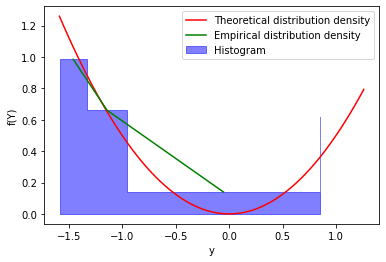

In [178]:
plt.fill_between(x, y1=f_x, y2=[0]*len(f_x), color='b', step='post', alpha=0.5, label="Histogram")
plt.plot(x_teor, f_y, label='Theoretical distribution density', c='r')
nx = []
for i in range(len(x) - 1):
    nx.append((x[i] + x[i+1]) / 2)
plt.plot(nx, f_x[:-1], color='g', label='Empirical distribution density')
plt.legend()
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Выдвинем гипотезу H0, что наши эмпирическое и теоретическое распределения совпадают.


Рассчитаем теоретическую вероятность попадания случайной величины в $i$-й интервал при условии, что гипотеза верна

$$p_i=F(B_i)-F(A_i) = \big(\frac{1}{6}((B_i)^3+4)-\frac{1}{6}((A_i)^3+4)\big)=\frac{1}{6}((B_i)^3-(A_i)^3)$$

In [179]:
p_teor = []
pi = [m / n] * M
F_in_B = []
F_in_A = []
for i in range(len(A)):
    F_Ai = 1./6. * ((A[i])**3+4)
    F_Bi = 1./6. * ((B[i])**3+4)
    F_in_A.append(F_Ai)
    F_in_B.append(F_Bi)
    p_teor.append(F_Bi - F_Ai)

Найдем значение критерия $\chi^2$:

In [180]:
xi = []
for i in range(M):
    xi.append(n * (p_teor[i] - pi[i])**2 / p_teor[i])
print("xi = " , sum(xi))

xi =  0.756489671076596


In [181]:
sum_pi = sum(pi)
print(sum_pi)

1.0


In [182]:
table2 = pd.DataFrame(data={"$F(A_i)$" : F_in_A, "$F(B_i)$": F_in_B, "$p_i$": p_teor, "$p_i^*$": pi, "$\chi_i$": xi})
table2

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,0.003548,0.273973,0.270425,0.25,0.308529
1,0.273973,0.522695,0.248722,0.25,0.001314
2,0.522695,0.769315,0.246620,0.25,0.009264
3,0.769315,0.997001,0.227686,0.25,0.437383


In [183]:
k = M - 3
print("k = " , k)

k =  1


$\chi_{0.01, 1}=13.28$ , $\chi_{0.99, 1}=0.297$

Так как $\chi_{0.01, 8}$ < $\chi$ < $\chi_{0.99, 8}$, то нет оснований отвергать гипотезу $H_0$

##  Задание 2) 
критерий Колмогорова

In [38]:
n = 30
Y = sample(n)
    
Y.sort()

Строим вариационный ряд:

In [39]:
variational_series = pd.DataFrame(data={"$Y_i$": Y})
variational_series.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
$Y_i$,-1.576909,-1.555536,-1.482709,-1.464098,-1.422189,-1.414881,-1.405358,-1.348241,-1.248168,-1.224615,...,-0.599943,-0.578492,-0.487615,0.668893,0.804145,0.891474,0.911968,1.086176,1.093826,1.153755


In [92]:
def empiric_func(sample):
    sample_without_repeat = sorted(list(set(sample)))
    sample_without_repeat.insert(0, -float('Inf'))
    size = len(sample)
    F_y = []
    propability = 0
    for elem in sample_without_repeat:
        propability += sample.count(elem)/size
        F_y.append(propability)
    return list(sample_without_repeat), F_y

Графики теоретической и эмпирической функций распределения

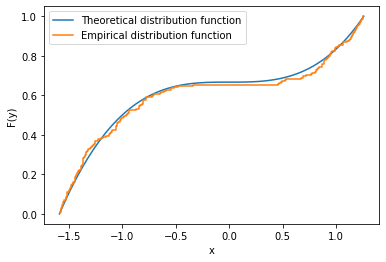

In [95]:
emp_x, emp_y = empiric_func(Y)
x_teor = np.linspace(-(4)**(1/3), 2**(1/3), 100)
y_teor = (x_teor**3 + 4) / 6 # теоретическая функция распределения
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.step(emp_x, emp_y, label='Empirical distribution function')
plt.ylabel('F(y)')
plt.xlabel('x')
plt.legend()

Определим максимальное по модулю отклонение между функциями:

In [162]:
d = []
for i in range(n):
    d.append(abs(i / n - ((Y[i])**3 + 4) / 6))

d = max(d)
print("d = ", d)

d =  0.06531437743350665


Вычислим значение критерия:

In [163]:
lambd = d * np.sqrt(n)
print("lambda = ", lambd)

lambda =  0.9236847838442034


Из таблицы вероятностей Колмогорова выбираем критическое значение $\lambda_y$:

$\gamma = 1-\alpha = 0.95$

$\lambda_\gamma$ = 1.38

 Так как 0 < $\lambda$ < $\lambda_\gamma$, то гипотеза $H_0$ подтверждена

##  Задание 3) 
критерий Мизеса

In [98]:
n = 50
Y = sample(n)  
Y.sort()

Найдем значения эмпирической функции распределения, теоретической функции распределения, значения квадрата отклонения:

In [99]:
Fn = []
F = []
squared_deviation = []

for i in range(1,n+1):
    Fn.append((i - 0.5) / n)
    F.append(((Y[i-1])**3+4)/6.)
    squared_deviation.append((Fn[i-1] - F[i-1])**2)

table = pd.DataFrame(data={"$y_i$": Y, "$F_n$": Fn, "$F$": F, "$\delta$": squared_deviation})
table

,$y_i$,$F_n$,$F$,$\delta$
0,-1.579823,0.01,0.009502,2.482186e-07
1,-1.543897,0.03,0.053324,5.439972e-04
2,-1.498445,0.05,0.105914,3.126375e-03
3,-1.473366,0.07,0.133601,4.045109e-03
4,-1.453279,0.09,0.155108,4.238999e-03
5,-1.430607,0.11,0.178678,4.716688e-03
6,-1.429233,0.13,0.180083,2.508268e-03
7,-1.416044,0.15,0.193429,1.886091e-03
8,-1.409980,0.17,0.199483,8.692521e-04
9,-1.387536,0.19,0.221439,9.884345e-04


Фактическое значение статистики:

In [45]:
print(1. / (12 * n) + sum(squared_deviation))

0.10744776352566067


Критическое значение статистики Мизеса на уровне значимости $\alpha=0.05$ по таблице равно $n\sigma^2_{\alpha}=0.461$.

Получили, что фактическое значение меньше критического. Значит, гипотеза не противоречит имеющимся данным